<h1>Predviđanje niza podataka linearnom regresijom</h1>

U ovoj bilježnici predviđati će se niz podataka pomoću linearne regresije. Učitati će se spremljeni modeli i skaleri te na temelju njih predvidjeti 1 dan unaprijed. Podatci će se zatim usporediti sa realnim podatcima i dati komentar na rezultate.

<h2>Učitavanje podataka</h2>

Prvo će se učitati svi potrebni podatci pomoću biblioteke pandas. Podatci se učitavaju odvojeno za proizvodnju i vremensku prognozu:

In [1]:

import pandas as pd
pd.set_option('display.max_rows', None)

# Učitavanje podataka o proizvodnji
dataframe_production_all = pd.read_csv('Data/SEDrava1_Filtered.csv')
dataframe_production_all['power_timestamp'] = pd.to_datetime(dataframe_production_all['power_timestamp'])
dataframe_production_all.head(100)


,power_timestamp,qty
0,2023-08-10 19:00:00,0.0000
1,2024-02-03 09:00:00,1.4190
2,2023-07-04 23:45:00,0.0000
3,2023-10-19 07:30:00,0.0000
4,2024-01-19 00:30:00,0.0000
5,2023-12-28 19:45:00,0.0000
6,2023-07-02 22:45:00,0.0000
7,2023-08-06 12:15:00,0.2310
8,2023-10-23 15:15:00,0.0000
9,2023-10-17 06:30:00,0.0000


Zatim ćemo za potrebe demonstracije učitati nekoliko retka, na temelju kojih ćemo predviđati.

In [2]:

# Odabir podskupa podataka o proizvodnji
dataframe_production_small = dataframe_production_all[(dataframe_production_all['power_timestamp'] >=pd.to_datetime('2024-01-20 00:00:00')) & (dataframe_production_all['power_timestamp'] <= pd.to_datetime('2024-02-01 00:00:00'))]
dataframe_production_small


,power_timestamp,qty
89,2024-01-31 17:00:00,0.0000
98,2024-01-29 11:15:00,1.6170
214,2024-01-26 23:00:00,0.0000
227,2024-01-30 03:15:00,0.0000
238,2024-01-24 09:15:00,0.1650
241,2024-01-22 21:00:00,0.0000
281,2024-01-29 15:30:00,0.0165
316,2024-01-22 17:45:00,0.0000
367,2024-01-25 04:00:00,0.0000
377,2024-01-31 22:15:00,0.0000


Učitavamo i prognozu za odabrani vremenski period. Biramo prognoze s najažurnijim TOF za to.

In [3]:

# Učitavanje podataka o vremenskoj prognozi
dataframe_weather_all = pd.read_csv('Data/SEDrava1_VrijemePrognoza_Filtered.csv')
dataframe_weather_all['tof'] = pd.to_datetime(dataframe_weather_all['tof'])
dataframe_weather_all['vt'] = pd.to_datetime(dataframe_weather_all['vt'])
dataframe_weather_all.head(100)


,tof,vt,barometer,outtemp,windspeed,winddir,rain,radiation,cloud_cover
0,2023-01-01 00:00:00,2023-01-01 01:00:00,1028.8,8.0,3.6,200,0.0,0,0.0
1,2023-01-01 00:00:00,2023-01-01 02:00:00,1028.7,7.0,3.6,202,0.0,0,0.0
2,2023-01-01 00:00:00,2023-01-01 03:00:00,1029.2,6.4,3.8,203,0.0,0,0.0
3,2023-01-01 00:00:00,2023-01-01 04:00:00,1028.9,6.0,4.0,208,0.0,0,0.0
4,2023-01-01 00:00:00,2023-01-01 05:00:00,1029.5,6.0,3.3,208,0.0,0,0.0
5,2023-01-01 00:00:00,2023-01-01 06:00:00,1029.5,6.0,3.3,201,0.0,0,0.5
6,2023-01-01 00:00:00,2023-01-01 07:00:00,1030.0,6.7,3.3,185,0.0,51,0.2
7,2023-01-01 00:00:00,2023-01-01 08:00:00,1030.2,8.1,3.9,178,0.0,182,0.0
8,2023-01-01 00:00:00,2023-01-01 09:00:00,1030.2,10.3,3.7,183,0.0,290,0.0
9,2023-01-01 00:00:00,2023-01-01 10:00:00,1029.7,12.1,4.7,180,0.0,334,27.1


In [4]:

# Odabir podskupa podataka o vremenskoj prognozi
selected_dates = (dataframe_weather_all['vt'] >= '2024-01-31 00:00:00')
filtered_df = dataframe_weather_all[selected_dates]
idx = filtered_df.groupby(['vt'])['tof'].transform('max') == filtered_df['tof']
dataframe_weather_small = filtered_df[idx]
dataframe_weather_small


,tof,vt,barometer,outtemp,windspeed,winddir,rain,radiation,cloud_cover
113621,2024-01-30 18:00:00,2024-01-31 00:00:00,1037.2,-1.2,2.4,82,0.0,0,0.0
113688,2024-01-31 00:00:00,2024-01-31 01:00:00,1037.1,-0.8,2.3,89,0.0,0,0.0
113689,2024-01-31 00:00:00,2024-01-31 02:00:00,1036.7,-1.1,2.1,87,0.0,0,0.0
113690,2024-01-31 00:00:00,2024-01-31 03:00:00,1036.4,-1.3,2.1,87,0.0,0,0.0
113691,2024-01-31 00:00:00,2024-01-31 04:00:00,1036.7,-1.4,1.6,93,0.0,0,0.0
113692,2024-01-31 00:00:00,2024-01-31 05:00:00,1036.8,-1.5,1.4,81,0.0,0,0.0
113693,2024-01-31 00:00:00,2024-01-31 06:00:00,1036.7,-1.2,1.3,81,0.0,0,0.0
113760,2024-01-31 06:00:00,2024-01-31 07:00:00,1036.6,0.1,0.8,60,0.0,109,0.0
113761,2024-01-31 06:00:00,2024-01-31 08:00:00,1036.7,1.9,0.8,39,0.0,267,0.0
113762,2024-01-31 06:00:00,2024-01-31 09:00:00,1036.8,3.7,0.4,44,0.0,396,0.0


<h2>Učitavanje modela</h2>

Sada trebamo učitati model. Model možemo učitati pomoću biblioteke pickle, kako je bio i spremljen:

In [5]:

import pickle

# Učitavanje modela
with open('reg_1.pkl', 'rb') as f:
    reg_1 = pickle.load(f)
with open('reg_2.pkl', 'rb') as f:
    reg_2 = pickle.load(f)
with open('reg_3.pkl', 'rb') as f:
    reg_3 = pickle.load(f)
    
# Učitavanje skalera    
with open('scaler_1.pkl', 'rb') as f:
    scaler_1 = pickle.load(f)  
# Učitavanje skalera    
with open('scaler_2.pkl', 'rb') as f:
    scaler_2 = pickle.load(f)    
# Učitavanje skalera    
with open('scaler_3.pkl', 'rb') as f:
    scaler_3 = pickle.load(f)    
    

<h2>Kod za predviđanje niza podataka</h2>

Konačno, napisati će se kod za predviđanje niza podataka. Kod će dinamički stvarati retke potrebne za input modela slijedno na temelju starih vrijednosti.

In [6]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Ova funkcija služi za predviđanje niza podataka unaprijed.
# Funkcija dinamički gradi retke pomoću kojih dalje predviđa na temelju vremenskih prognoza i predviđanja u prethodnim koracima
# Ulazni argumenti su:
#    current_datetime: pandas datetime od kojeg počinje predviđanje
#    end_datetime: pandas datetime do kojeg se predviđa (uključivo)
#    dataframe_production: pandas dataframe s podatcima o proizvodnji. Moraju biti prisutni svi podatci od current_datetime do fiksnog broja točaka iza, ovisno o modelu
#    dataframe_weather: pandas dataframe s podatcima o vremenskoj prognozi. Moraju biti prisutni podatci za sve pune sate od current_datetime do end_datetime
#    model: model strojnog učenja
def predict_series(current_datetime, end_datetime, dataframe_production, dataframe_weather, model, scaler, poly=1, verbose=False):
    
    if(verbose): print("Početak predviđanja")
    #if(verbose): print("Tablica proizvodnje na početku je: ")    
    #if(verbose): print(dataframe_production)    
    dataframe_predicted = pd.DataFrame(columns=["power_timestamp", "qty"])
    
    while(current_datetime < end_datetime):
        
        if(verbose): print("")    
        if(verbose): print("#####")
        if(verbose): print("Novi korak")    
        if(verbose): print("#####") 
        if(verbose): print("")
            
        if(verbose): print("Trenutni datum je: " + str(current_datetime))
        
        weather_current_row = dataframe_weather.loc[(dataframe_weather['vt'] == current_datetime.floor('H'))].reset_index(drop=True)
        production_current_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime)].reset_index(drop=True)
        production_15min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=15))].reset_index(drop=True)
        production_30min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=30))].reset_index(drop=True)
        production_45min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=45))].reset_index(drop=True)
        production_60min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=60))].reset_index(drop=True)
        production_75min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=75))].reset_index(drop=True)
        production_90min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=90))].reset_index(drop=True)
        production_105min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=105))].reset_index(drop=True)
        production_120min_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(minutes=120))].reset_index(drop=True)
        production_day_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(hours=24))].reset_index(drop=True)
        production_week_row = dataframe_production.loc[(dataframe_production['power_timestamp'] == current_datetime - pd.Timedelta(hours=24*7))].reset_index(drop=True)
        
        prediction_row = [weather_current_row.iloc[0, 2], 
                          weather_current_row.iloc[0, 3], 
                          weather_current_row.iloc[0, 4], 
                          weather_current_row.iloc[0, 5], 
                          weather_current_row.iloc[0, 6], 
                          weather_current_row.iloc[0, 7], 
                          weather_current_row.iloc[0, 8], 
                          production_current_row.iloc[0, 1], 
                          production_15min_row.iloc[0, 1], 
                          production_30min_row.iloc[0, 1], 
                          production_45min_row.iloc[0, 1], 
                          production_60min_row.iloc[0, 1],
                          production_75min_row.iloc[0, 1], 
                          production_90min_row.iloc[0, 1], 
                          production_105min_row.iloc[0, 1], 
                          production_120min_row.iloc[0, 1],
                          production_day_row.iloc[0, 1],
                          production_week_row.iloc[0, 1]]

        if(verbose): print("Redak na temelju kojeg se predviđa je: " + str(prediction_row))
        
        prediction_row = np.array(prediction_row).reshape(1, -1)
        
        if(poly > 1):
            pf = PolynomialFeatures(poly)
            prediction_row = pf.fit_transform(prediction_row)
            
        prediction_row = scaler.transform(prediction_row)
        
        predicted_num = model.predict(prediction_row)[0]
        
        if(verbose): print("Broj koji je predviđen je: " + str(predicted_num))
        
        current_datetime = current_datetime + pd.Timedelta(minutes=15)
        
        new_row = pd.DataFrame({'power_timestamp': [current_datetime], 'qty': [predicted_num]})
        dataframe_production = pd.concat([dataframe_production,new_row], ignore_index = True)
        dataframe_predicted = pd.concat([dataframe_predicted,new_row], ignore_index = True)
        
        #if(verbose): print("Tablica proizvodnje sada je: ")    
        #if(verbose): print(dataframe_production)   
        
    if(verbose): print("")      
    if(verbose): print("!!Završeno predviđanje!!")
    if(verbose): print("") 
 
    return dataframe_predicted

Ispod je demonstracija napisanog koda za primjer podataka. Prije objave rezultata biti će potrebno napraviti temeljitije testiranje, ovo je samo za demonstraciju i grubu procjenu kvalitete.

In [7]:

# Demonstracija rada koda - ovdje namjestiti parametre
start_datetime = pd.to_datetime('2024-02-01 00:00:00')
end_datetime = pd.to_datetime('2024-02-03 00:00:00')


In [8]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

dataframe_real = dataframe_production_all[(dataframe_production_all['power_timestamp'] > start_datetime) & (dataframe_production_all['power_timestamp'] <= end_datetime)].sort_values(by='power_timestamp')


In [9]:

# Predviđanje - linearna regresija stupnja 1
dataframe_predicted = predict_series(start_datetime, end_datetime, dataframe_production_small, dataframe_weather_small, reg_1, scaler_1, poly=1, verbose=True)


Početak predviđanja

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:00:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Broj koji je predviđen je: 0.021056209610873566

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:15:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, 0.021056209610873566, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Broj koji je predviđen je: 0.038506401300101356

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:30:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, 0.038506401300101356, 0.021056209610873566, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Broj koji je predviđen je: 0.05443555050467441

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:45:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, 0.05443555050467441, 0.038506401300101356, 0.0210562096108735

C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\AppData\Local\Temp\ipykernel_18252\2138579732.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataframe_predicted = pd.concat([dataframe_predicted,new_row], ignore_index = True)
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\and

Redak na temelju kojeg se predviđa je: [1026.8, 8.6, 3.6, 204, 0.0, 492, 0.0, 1.267458617748767, 1.2148273206053724, 1.1526690695565485, 1.0797685316304764, 0.9968963866452492, 0.9051365138224964, 0.8342499053318939, 0.7600664996555454, 0.6594451361746987, 1.683, 1.584]
Broj koji je predviđen je: 1.3050676678281588

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 11:30:00
Redak na temelju kojeg se predviđa je: [1026.8, 8.6, 3.6, 204, 0.0, 492, 0.0, 1.3050676678281588, 1.267458617748767, 1.2148273206053724, 1.1526690695565485, 1.0797685316304764, 0.9968963866452492, 0.9051365138224964, 0.8342499053318939, 0.7600664996555454, 1.65, 1.551]
Broj koji je predviđen je: 1.3297813635748366

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 11:45:00
Redak na temelju kojeg se predviđa je: [1026.8, 8.6, 3.6, 204, 0.0, 492, 0.0, 1.3297813635748366, 1.3050676678281588, 1.267458617748767, 1.2148273206053724, 1.1526690695565485, 1.0797685316304764, 0.9968963866452492, 0.9051365138224964, 0.

C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid f

Redak na temelju kojeg se predviđa je: [1028.8, 3.1, 4.6, 282, 0.0, 0, 56.2, 0.061120202118163214, 0.06706804229806279, 0.07192276312459928, 0.07494166936523264, 0.07510213041511346, 0.07808018590111698, 0.07806783649839824, 0.0746297684360624, 0.06748484432400453, 0.0, 0.0]
Broj koji je predviđen je: 0.05709198001725141

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 23:15:00
Redak na temelju kojeg se predviđa je: [1028.8, 3.1, 4.6, 282, 0.0, 0, 56.2, 0.05709198001725141, 0.061120202118163214, 0.06706804229806279, 0.07192276312459928, 0.07494166936523264, 0.07510213041511346, 0.07808018590111698, 0.07806783649839824, 0.0746297684360624, 0.0, 0.0]
Broj koji je predviđen je: 0.05237692302522984

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 23:30:00
Redak na temelju kojeg se predviđa je: [1028.8, 3.1, 4.6, 282, 0.0, 0, 56.2, 0.05237692302522984, 0.05709198001725141, 0.061120202118163214, 0.06706804229806279, 0.07192276312459928, 0.07494166936523264, 0.07510213041511346, 0

C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid f

Redak na temelju kojeg se predviđa je: [1030.0, 9.1, 6.4, 337, 0.0, 502, 0.0, 1.0130523217509348, 0.9467934297456243, 0.8661604433379535, 0.7786163828541364, 0.6794995314935632, 0.6127938322528457, 0.5420671408681095, 0.4674519956038049, 0.3874305520395956, 1.2148273206053724, 1.4355]
Broj koji je predviđen je: 1.0765476107424943

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 11:15:00
Redak na temelju kojeg se predviđa je: [1030.0, 9.1, 6.4, 337, 0.0, 502, 0.0, 1.0765476107424943, 1.0130523217509348, 0.9467934297456243, 0.8661604433379535, 0.7786163828541364, 0.6794995314935632, 0.6127938322528457, 0.5420671408681095, 0.4674519956038049, 1.267458617748767, 1.221]
Broj koji je predviđen je: 1.1226996769878912

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 11:30:00
Redak na temelju kojeg se predviđa je: [1030.0, 9.1, 6.4, 337, 0.0, 502, 0.0, 1.1226996769878912, 1.0765476107424943, 1.0130523217509348, 0.9467934297456243, 0.8661604433379535, 0.7786163828541364, 0.6794995314

C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid f

Redak na temelju kojeg se predviđa je: [1028.7, 3.9, 2.1, 215, 0.0, 0, 100.0, 0.12077961556557157, 0.12753773504121801, 0.13068228325671521, 0.13045949394686934, 0.127509501395308, 0.12367901051681893, 0.09894650906240676, 0.07114418562447228, 0.040896858194192365, 0.07494166936523264, 0.0]
Broj koji je predviđen je: 0.11170362476586004

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 22:30:00
Redak na temelju kojeg se predviđa je: [1028.7, 3.9, 2.1, 215, 0.0, 0, 100.0, 0.11170362476586004, 0.12077961556557157, 0.12753773504121801, 0.13068228325671521, 0.13045949394686934, 0.127509501395308, 0.12367901051681893, 0.09894650906240676, 0.07114418562447228, 0.07192276312459928, 0.0]
Broj koji je predviđen je: 0.09972529479877573

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 22:45:00
Redak na temelju kojeg se predviđa je: [1028.7, 3.9, 2.1, 215, 0.0, 0, 100.0, 0.09972529479877573, 0.11170362476586004, 0.12077961556557157, 0.12753773504121801, 0.13068228325671521, 0.1304594939

C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\andro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid f

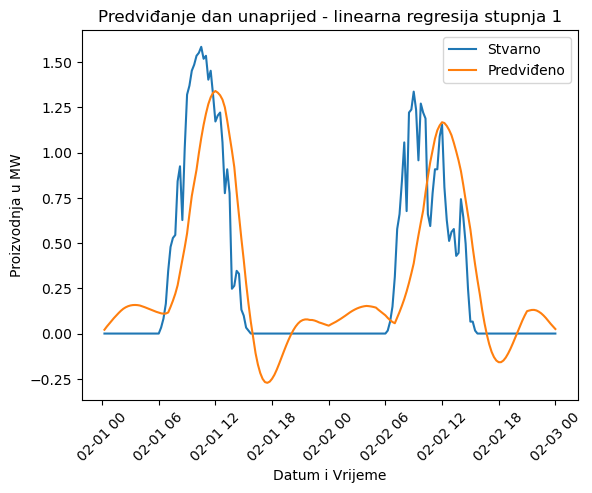

RMSE je: 0.3058094736144483


In [10]:

# Prikaz realnih i predviđenih vrijednosti - linearna regresija stupnja 1
plt.figure()
plt.title('Predviđanje dan unaprijed - linearna regresija stupnja 1')
plt.xlabel('Datum i Vrijeme')
plt.ylabel('Proizvodnja u MW')
plt.plot(dataframe_real['power_timestamp'], dataframe_real['qty'], label="Stvarno")
plt.plot(dataframe_predicted['power_timestamp'], dataframe_predicted['qty'], label="Predviđeno")
plt.legend()
plt.xticks(rotation=45)
plt.show()

print("RMSE je: " + str(sqrt(mean_squared_error(dataframe_predicted["qty"], dataframe_real["qty"]))))


In [11]:

# Predviđanje - linearna regresija stupnja 2
dataframe_predicted = predict_series(start_datetime, end_datetime, dataframe_production_small, dataframe_weather_small, reg_2, scaler_2, poly=2, verbose=True)


Početak predviđanja

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:00:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Broj koji je predviđen je: -0.0006647025978276377

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:15:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, -0.0006647025978276377, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Broj koji je predviđen je: -0.0015560967079974453

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:30:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, -0.0015560967079974453, -0.0006647025978276377, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Broj koji je predviđen je: -0.002578590154067195

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 00:45:00
Redak na temelju kojeg se predviđa je: [1032.5, 0.9, 1.3, 261, 0.0, 0, 5.2, -0.002578590154067195, -0.0015560967079974453, -0

Redak na temelju kojeg se predviđa je: [1026.8, 8.6, 3.6, 204, 0.0, 492, 0.0, 1.4893971328784388, 1.4807561283564787, 1.4557969074170352, 1.4186919799858657, 1.3648134837926915, 1.2957847234109974, 1.2101240997708829, 1.1127926709790181, 1.0055315070027737, 1.65, 1.551]
Broj koji je predviđen je: 1.4838345453327997

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 11:45:00


C:\Users\andro\AppData\Local\Temp\ipykernel_18252\2138579732.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataframe_predicted = pd.concat([dataframe_predicted,new_row], ignore_index = True)


Redak na temelju kojeg se predviđa je: [1026.8, 8.6, 3.6, 204, 0.0, 492, 0.0, 1.4838345453327997, 1.4893971328784388, 1.4807561283564787, 1.4557969074170352, 1.4186919799858657, 1.3648134837926915, 1.2957847234109974, 1.2101240997708829, 1.1127926709790181, 1.5345, 1.485]
Broj koji je predviđen je: 1.4613716170979067

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 12:00:00
Redak na temelju kojeg se predviđa je: [1026.4, 9.8, 3.5, 230, 0.0, 462, 2.0, 1.4613716170979067, 1.4838345453327997, 1.4893971328784388, 1.4807561283564787, 1.4557969074170352, 1.4186919799858657, 1.3648134837926915, 1.2957847234109974, 1.2101240997708829, 1.386, 1.485]
Broj koji je predviđen je: 1.4178008818365533

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 12:15:00
Redak na temelju kojeg se predviđa je: [1026.4, 9.8, 3.5, 230, 0.0, 462, 2.0, 1.4178008818365533, 1.4613716170979067, 1.4838345453327997, 1.4893971328784388, 1.4807561283564787, 1.4557969074170352, 1.4186919799858657, 1.364813483792691

Redak na temelju kojeg se predviđa je: [1029.3, 3.8, 3.3, 278, 0.1, 0, 74.6, 0.09064267771887727, 0.09743193421549992, 0.10410226511300108, 0.10850221293178472, 0.11181668023191413, 0.11460731633290694, 0.11520400007415985, 0.10932259514941334, 0.10314556081022302, 0.0, 0.0]
Broj koji je predviđen je: 0.0842095651584191

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 22:45:00
Redak na temelju kojeg se predviđa je: [1029.3, 3.8, 3.3, 278, 0.1, 0, 74.6, 0.0842095651584191, 0.09064267771887727, 0.09743193421549992, 0.10410226511300108, 0.10850221293178472, 0.11181668023191413, 0.11460731633290694, 0.11520400007415985, 0.10932259514941334, 0.0, 0.0]
Broj koji je predviđen je: 0.0784814340904521

#####
Novi korak
#####

Trenutni datum je: 2024-02-01 23:00:00
Redak na temelju kojeg se predviđa je: [1028.8, 3.1, 4.6, 282, 0.0, 0, 56.2, 0.0784814340904521, 0.0842095651584191, 0.09064267771887727, 0.09743193421549992, 0.10410226511300108, 0.10850221293178472, 0.11181668023191413, 0.11460

Redak na temelju kojeg se predviđa je: [1031.4, 6.7, 6.4, 308, 0.0, 343, 74.1, 0.4438758909736562, 0.4181228247488987, 0.3935614741746715, 0.38052546225924583, 0.3742089701644973, 0.36492314312070306, 0.3574199614071834, 0.33732582228295777, 0.2555254988961138, 1.1127926709790181, 1.551]
Broj koji je predviđen je: 0.4683340807538272

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 10:00:00
Redak na temelju kojeg se predviđa je: [1031.0, 8.1, 6.3, 328, 0.0, 475, 0.3, 0.4683340807538272, 0.4438758909736562, 0.4181228247488987, 0.3935614741746715, 0.38052546225924583, 0.3742089701644973, 0.36492314312070306, 0.3574199614071834, 0.33732582228295777, 1.2101240997708829, 1.6005]
Broj koji je predviđen je: 0.6197925045525902

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 10:15:00
Redak na temelju kojeg se predviđa je: [1031.0, 8.1, 6.3, 328, 0.0, 475, 0.3, 0.6197925045525902, 0.4683340807538272, 0.4438758909736562, 0.4181228247488987, 0.3935614741746715, 0.38052546225924583, 0.3

Redak na temelju kojeg se predviđa je: [1029.5, 3.5, 1.9, 254, 0.0, 0, 99.6, 0.421907489447149, 0.45220124196629313, 0.4968768485059895, 0.5188943077840089, 0.5174622919418161, 0.49387058571560133, 0.4506739894005308, 0.39088378763697434, 0.3179993789896236, 0.11460731633290694, 0.0]
Broj koji je predviđen je: 0.389644241814689

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 21:30:00
Redak na temelju kojeg se predviđa je: [1029.5, 3.5, 1.9, 254, 0.0, 0, 99.6, 0.389644241814689, 0.421907489447149, 0.45220124196629313, 0.4968768485059895, 0.5188943077840089, 0.5174622919418161, 0.49387058571560133, 0.4506739894005308, 0.39088378763697434, 0.11181668023191413, 0.0]
Broj koji je predviđen je: 0.3514259246416521

#####
Novi korak
#####

Trenutni datum je: 2024-02-02 21:45:00
Redak na temelju kojeg se predviđa je: [1029.5, 3.5, 1.9, 254, 0.0, 0, 99.6, 0.3514259246416521, 0.389644241814689, 0.421907489447149, 0.45220124196629313, 0.4968768485059895, 0.5188943077840089, 0.51746229194181

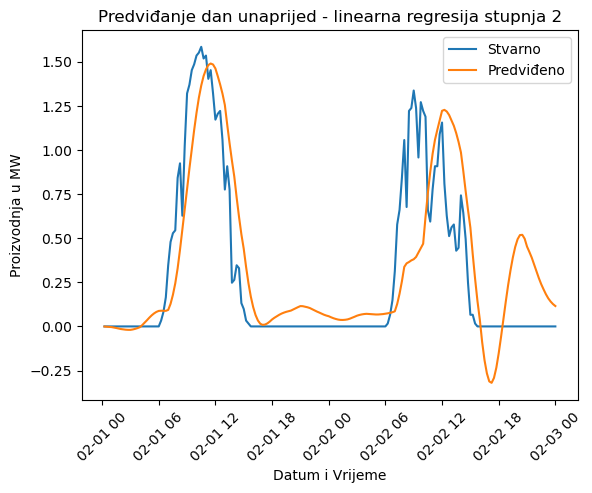

RMSE je: 0.30228862159241376


In [12]:

# Prikaz realnih i predviđenih vrijednosti - linearna regresija stupnja 2
plt.figure()
plt.title('Predviđanje dan unaprijed - linearna regresija stupnja 2')
plt.xlabel('Datum i Vrijeme')
plt.ylabel('Proizvodnja u MW')
plt.plot(dataframe_real['power_timestamp'], dataframe_real['qty'], label="Stvarno")
plt.plot(dataframe_predicted['power_timestamp'], dataframe_predicted['qty'], label="Predviđeno")
plt.legend()
plt.xticks(rotation=45)
plt.show()

print("RMSE je: " + str(sqrt(mean_squared_error(dataframe_predicted["qty"], dataframe_real["qty"]))))


In [13]:

# Predviđanje - linearna regresija stupnja 2
# dataframe_predicted = predict_series(start_datetime, end_datetime, dataframe_production_small, dataframe_weather_small, reg_3, scaler_3, poly=3, verbose=True)


In [14]:

# Prikaz realnih i predviđenih vrijednosti - linearna regresija stupnja 3
#plt.figure()
#plt.title('Predviđanje dan unaprijed - linearna regresija stupnja 1')
#plt.xlabel('Datum i Vrijeme')
#plt.ylabel('Proizvodnja u MW')
#plt.plot(dataframe_real['power_timestamp'], dataframe_real['qty'], label="Stvarno")
#plt.plot(dataframe_predicted['power_timestamp'], dataframe_predicted['qty'], label="Predviđeno")
#plt.legend()
#plt.xticks(rotation=45)
#plt.show()


Vidi se da u ovom slučaju predviđanje na dulje staze pokazuje uniformniji rast i nedostatak fluktuacija u usporedbi s realnim vrijednostima, iako je generalni trend i red veličine vrijednosti pogođen. RMSE greška je za predviđanje dan unaprijed bolja za linearnu regresiju stupnja 2. Oba modela se također naizgled pouzdaju na podatke iz neposredne prošlosti te kao da kasne za realnom vrijednosti. Linearna regresija stupnja 3 pokazala se previše nestabilnom, daje grešku teženja u beskonačnost prilikom predviđanja duljeg niza unaprijed.

Sve u svemu, za ovaj jednostavni model rezultat je dobar. No, svejedno ima nedostataka koji će se nastojati riješiti kompleksnijim modelima namijenjenim predviđanju vremenskog niza.